In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [18]:
def plot_roc(p_ddG, b_ddG,ax):
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    maxValue = 5
    minValue = 0
    count = 0
    while (maxValue-minValue)>-3:
        #We are only interested in non-zero values of bad
        i = 0
        cum_TP = 0
        cum_FP = 0
        threshold = maxValue-minValue
        while i < len(p_ddG):
            if p_ddG[i]>=float(threshold):
                cum_TP+=1
            i+=1
        i = 0
        while i < len(b_ddG):
            if b_ddG[i]>=float(threshold):
                cum_FP+=1
            i+=1
        #print ("FP: %s" % cum_FP)
        #print ("TP: %s" % cum_TP)
        FPR=cum_FP/float(len(b_ddG))
        TPR=cum_TP/float(len(p_ddG))
        #print ("FPR and TPR %s, %s" % (FPR,TPR))
        rate = 0
        if(FPR >0 ):
            rate = TPR/FPR
        #print ("Threshold, TPR and FPR %s, %s, %s,%s" % (minValue, TPR, FPR, rate))
        TPR_list.append(TPR)
        FPR_list.append(FPR)
        minValue+=0.05
        count += 1
    #Calculating AUC, taking the 100 timesteps into account
    auc=np.sum(TPR_list)/count
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    #ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

In [19]:
f = open('fullList.ROC.benign.txt','r')
benignROC = []
for line in f:
    benignROC.append(line.strip())

benignROC = map(float,benignROC)
benignROC.sort(reverse=True)
len(benignROC)
listOfZeros = [0]*len(benignROC)
len(listOfZeros)

1039

In [20]:
f = open('fullList.ROC.pathogenic.txt','r')
pathogenicROC = []
for line in f:
    pathogenicROC.append(line.strip())

pathogenicROC = map(float, pathogenicROC)
pathogenicROC.sort(reverse=True)
len(pathogenicROC)
listOfOnes = [1]*len(pathogenicROC)
len(listOfOnes)
fullList = benignROC + pathogenicROC
classList = listOfZeros + listOfOnes
fullList = np.array(fullList)
classList = np.array(classList)

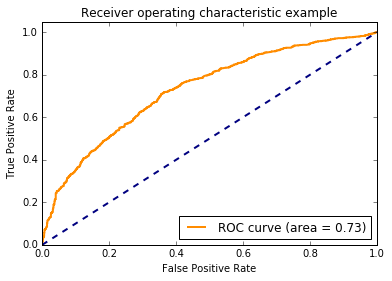

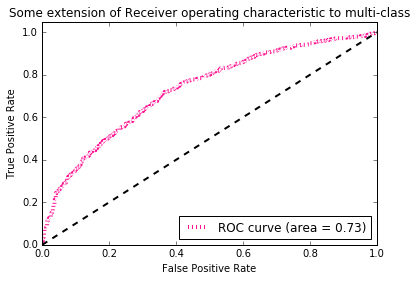

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(classList, fullList)
fpr
tpr
thresholds
aucR = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % aucR )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot(fpr, tpr,
         label='ROC curve (area = {0:0.2f})'
               ''.format(aucR),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [30]:
f = open('fullList.ROC.benign.imutant.txt','r')
benignROC = []
for line in f:
    benignROC.append(line.strip())

benignROC = map(float,benignROC)
benignROC = map(lambda x: x*-1, benignROC)
benignROC.sort(reverse=True)
len(benignROC)
listOfZeros = [0]*len(benignROC)
len(listOfZeros)

564

In [31]:
f = open('fullList.ROC.pathogenic.imutant.txt','r')
pathogenicROC = []
for line in f:
    pathogenicROC.append(line.strip())

pathogenicROC = map(float, pathogenicROC)
pathogenicROC = map(lambda x: x*-1, pathogenicROC)
pathogenicROC.sort(reverse=True)
len(pathogenicROC)
listOfOnes = [1]*len(pathogenicROC)
len(listOfOnes)
fullList = benignROC + pathogenicROC
classList = listOfZeros + listOfOnes
fullList = np.array(fullList)
classList = np.array(classList)

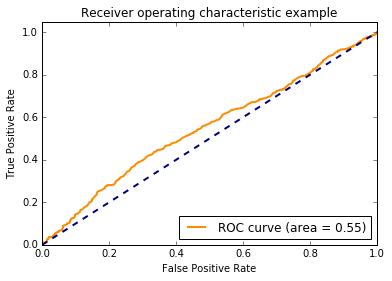

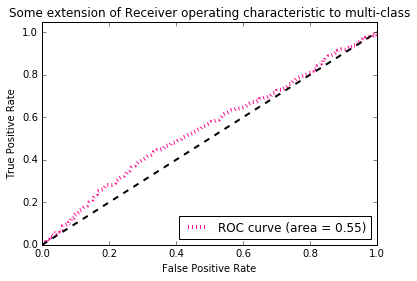

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(classList, fullList)
fpr
tpr
thresholds
aucR = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % aucR )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot(fpr, tpr,
         label='ROC curve (area = {0:0.2f})'
               ''.format(aucR),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()